# IMPORT THE LIBRARIES

In [1]:
import pandas as pd

# LOAD THE DATASET

In [2]:
df=pd.read_parquet('classificationData.parquet',engine='pyarrow')
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
5688397,US,46632376,R2O0G4Q1PNWG1F,B00DHZBM98,36942601,Rainbow Star Hard Cover Case for Motorola Droi...,Wireless,5,0,0,0,1,Awesome case,This case fit my phone perfectly and I loved t...,2014-01-21
8547800,US,21069192,R26FF3VKSSF9PN,B003NBTU2M,709773372,Retractable Car Charger for HTC EVO 4G,Wireless,5,1,1,0,1,Love this thing!,This was one of the most practical and economi...,2011-03-01
4478014,US,9715549,R1SJSBZJM2V11J,B006WCT7Q8,165672789,Micro USB Wall Charger for Sony Ericsson Vivaz...,Wireless,5,0,0,0,1,Five Stars,excelente,2014-08-07
4111190,US,6333661,R3GBSEQWBB0P6A,B00KR9FT4Q,897361851,RAVPower 2800mAh Galaxy S4 Replacement Battery...,Wireless,5,0,2,0,1,5 stars,I love it. And it's reliable.,2014-09-16
3221802,US,6464636,R2BGCP8L0OB7R6,B00D4BDG9O,198845889,Kyocera Duraxt E4277 Soft Touch Rubberized Hol...,Wireless,5,1,1,0,1,Five Stars,I got the right one this time,2014-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4484327,US,9280610,RXL3VT2ZJUL5A,B0098USUYG,47084439,BestDealUSA Great Fit Screw Type Short Top Roo...,Wireless,2,0,0,0,1,Two Stars,None,2014-08-06
5137132,US,1908736,R2EYBLFCAERSOQ,B00BTNEAR6,336272712,Aria Rose Pink White Zebra Combo Hard Soft Hig...,Wireless,2,0,0,0,1,It's ok,None,2014-04-28
7553805,US,17989523,R3GRR0VNSOJTW1,B003Y34SMG,968335071,Aimo Wireless IPHONE4GPCLP005H Rubber Essentia...,Wireless,2,0,0,0,1,"Fits great, but color is off",None,2013-01-07
5958680,US,31485740,R1X5SQQCE967EE,B00EPLTC1I,325331105,"Nexus 5 Case, Ringke [Slim] Snug-Fit Slender [...",Wireless,2,0,0,0,1,OK Slim Case,None,2013-12-08


# EDA

In [3]:
df.count()

marketplace          450100
customer_id          450100
review_id            450100
product_id           450100
product_parent       450100
product_title        450100
product_category     450100
star_rating          450100
helpful_votes        450100
total_votes          450100
vine                 450100
verified_purchase    450100
review_headline      450100
review_body          343168
review_date          450100
dtype: int64

In [4]:
df.isnull().sum()

marketplace               0
customer_id               0
review_id                 0
product_id                0
product_parent            0
product_title             0
product_category          0
star_rating               0
helpful_votes             0
total_votes               0
vine                      0
verified_purchase         0
review_headline           0
review_body          106932
review_date               0
dtype: int64

+ We drop review_body because it have lot of missing values

In [5]:
df.dropna(subset=['review_body'],inplace = True)

# dropping unneccesory columns

In [6]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [7]:
df1 = df.drop(columns=['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category','helpful_votes', 'total_votes','review_body', 'vine', 'verified_purchase','review_date'])
df1.head()

,star_rating,review_headline
5688397,5,Awesome case
8547800,5,Love this thing!
4478014,5,Five Stars
4111190,5,5 stars
3221802,5,Five Stars


In [8]:
#df['customer_id'].nunique()

In [9]:
#df['review_id'].nunique()

In [10]:
#df['product_id'].nunique()

In [11]:
df1.duplicated()

5688397    False
8547800    False
4478014    False
4111190    False
3221802     True
           ...  
8917982     True
142724      True
6012033     True
3592293     True
8564454     True
Length: 343168, dtype: bool

In [12]:
#Count of duplicated rows
df1[df1.duplicated()].shape

(204343, 2)

In [13]:
df1.drop_duplicates()

,star_rating,review_headline
5688397,5,Awesome case
8547800,5,Love this thing!
4478014,5,Five Stars
4111190,5,5 stars
5157269,5,super cute
...,...,...
4889413,2,Quality isn't great
7684843,2,"Poor quality, lightening connection is too large"
281695,2,Blinding LEDS - Only worked 2 weeks...
4783403,2,USB Car Charger is Flawed


In [14]:
df1.shape

(343168, 2)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343168 entries, 5688397 to 8564454
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   star_rating      343168 non-null  int32 
 1   review_headline  343168 non-null  object
dtypes: int32(1), object(1)
memory usage: 6.5+ MB


In [16]:
df1.describe()

,star_rating
count,343168.000000
mean,3.890779
std,1.462352
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


# Converting the rating to Positive or Negative

In [17]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['star_rating'] == 1 or row['star_rating']  == 2 :
        val = 'Negative'
    elif row['star_rating'] == 3 or row['star_rating'] == 4 :
        val = 'Neutral'
    elif row['star_rating'] == 5  :
        val = 'Positive'
    else:
        val = -1
    return val

# Applying the function in our new column

In [18]:
df1['sentiment'] = df1.apply(f, axis=1)
df1.head()

,star_rating,review_headline,sentiment
5688397,5,Awesome case,Positive
8547800,5,Love this thing!,Positive
4478014,5,Five Stars,Positive
4111190,5,5 stars,Positive
3221802,5,Five Stars,Positive


In [19]:
df1.head(20)

,star_rating,review_headline,sentiment
5688397,5,Awesome case,Positive
8547800,5,Love this thing!,Positive
4478014,5,Five Stars,Positive
4111190,5,5 stars,Positive
3221802,5,Five Stars,Positive
5157269,5,super cute,Positive
2232233,5,Five Stars,Positive
1753049,5,They are rugged and work just as great as an OEM,Positive
8723917,5,AVH-P4200DVD,Positive
8576142,5,"So far, so good.",Positive


# Removing Punctuation and Brackets and etc.

In [20]:
import nltk
import re

In [21]:
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('english')
#stop_word_list

In [22]:
df1['review_headline'] = df1['review_headline'].apply(lambda x: re.sub('[,\.!?:()"]', '', x))
df1['review_headline'] = df1['review_headline'].apply(lambda x: re.sub('[^a-zA-Z"]', ' ', x))

df1['review_headline'] = df1['review_headline'].apply(lambda x: x.lower())

df1['review_headline'] = df1['review_headline'].apply(lambda x: x.strip())

"""
I closed the stopword process because it took a long time.
If you want, you can try opening the codes in the comment line.
"""
#def token(values):
   # words = nltk.tokenize.word_tokenize(values)
    #filtered_words = [word for word in words if word not in set(stopwords.words("english"))]
    #not_stopword_doc = " ".join(filtered_words)
    #return not_stopword_doc
#data['review content'] = data['review content'].apply(lambda x: token(x))

'\nI closed the stopword process because it took a long time.\nIf you want, you can try opening the codes in the comment line.\n'

# Visualisation for sentiments

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


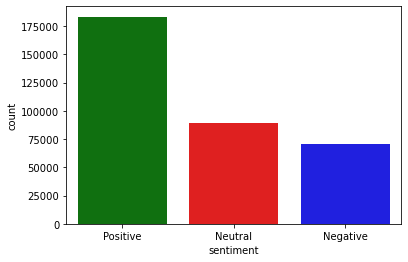

Positive    183397
Neutral      88947
Negative     70824
Name: sentiment, dtype: int64


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df1["sentiment"], palette = ["green","red","blue"])
plt.show()
print(df1.sentiment.value_counts())

# FEATURE EXTRACTION

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
Vectorizer = CountVectorizer()

# BALANCE THE DATA

In [25]:
x = df1['review_headline']
y = df1['sentiment']
y.value_counts()

Positive    183397
Neutral      88947
Negative     70824
Name: sentiment, dtype: int64

In [26]:
from imblearn.under_sampling import RandomUnderSampler

In [27]:
import numpy as np
rus = RandomUnderSampler()
y = np.array(y)
x = np.array(x)
y = np.reshape(y, (-1,1))
x = np.reshape(x, (-1,1))
x_r, y_r = rus.fit_resample(x, y)
print(len(y_r))

212472


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_r,y_r,test_size=0.2,random_state=42)
x_test = x_test.reshape(-1)
x_train = Vectorizer.fit_transform(x_train.reshape(-1))
x_test = Vectorizer.transform(x_test)
rus.fit(x_train, y_train)

RandomUnderSampler()

# MODEL BUILDING and PREDICTIION

# MULTINOMIAL NAIVE BAYES

In [29]:
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle
import seaborn as sns

In [30]:
mnb = MultinomialNB()
mnb.fit(x_train , y_train)

MultinomialNB()

In [31]:
pred = mnb.predict(x_test)

In [32]:
print(confusion_matrix(y_test , pred))
print(classification_report(y_test , pred))
print(accuracy_score(y_test , pred))

[[11343  2137   567]
 [ 2105  9173  2905]
 [  970  2682 10613]]
              precision    recall  f1-score   support

    Negative       0.79      0.81      0.80     14047
     Neutral       0.66      0.65      0.65     14183
    Positive       0.75      0.74      0.75     14265

    accuracy                           0.73     42495
   macro avg       0.73      0.73      0.73     42495
weighted avg       0.73      0.73      0.73     42495

0.7325332392046123


# LOGISTIC REGRESSION

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
Model = LogisticRegression(max_iter = 4000)
Model.fit(x_train, y_train)

LogisticRegression(max_iter=4000)

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [36]:
result = Model.predict(x_test)
print(confusion_matrix(y_test, result))

[[11684  1853   510]
 [ 1949  9228  3006]
 [  573  2675 11017]]


In [37]:
accuracy = accuracy_score(y_test, result)
print(accuracy)

0.7513589834098129


## Test the Model

In [38]:
pred1 = Model.predict(Vectorizer.transform(["Do not buy it. Horrible product"]))
pred2 = Model.predict(Vectorizer.transform(["This is probably the best thing i have ever bought"]))
pred3 = Model.predict(Vectorizer.transform(["It works fine! Thank you!"]))
pred4 = Model.predict(Vectorizer.transform(["Many disadvantages, i do not recommend it"]))
pred5 = Model.predict(Vectorizer.transform(["My delivery is 2 months delayed. Pure lack of profissionalism"]))
pred6 = Model.predict(Vectorizer.transform(["Excellent product!"]))

print(pred1, pred2, pred3, pred4, pred5, pred6)

['Negative'] ['Positive'] ['Positive'] ['Negative'] ['Negative'] ['Positive']


+ accuracy is less,so to improve this we are appling randomsearchcv hyperparameter tuning

# HYPERPARAMETER TUNING

## Gridsearch CV

# RANDOM SEARCH CV

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [40]:
distributions = dict(C=uniform(loc=0, scale=4))

In [41]:
clf = RandomizedSearchCV(Model, distributions, random_state=0)

In [42]:
search = clf.fit(x_train,y_train)
search.best_params_

{'C': 2.860757465489678}

In [43]:
pd.DataFrame(np.c_[y_test , pred] , columns=["Actual" , "Predicted"])

,Actual,Predicted
0,Negative,Positive
1,Negative,Neutral
2,Negative,Negative
3,Neutral,Neutral
4,Neutral,Neutral
...,...,...
42490,Neutral,Neutral
42491,Negative,Negative
42492,Positive,Positive
42493,Negative,Negative


# SAVE THE PICKLE FILE

In [44]:
import pickle
pickle.dump(Vectorizer, open("count-Vectorizer.pkl" , "wb"))
pickle.dump(Model, open("BlitzAI_xentimental_Analysis.pkl" , "wb"))

# LOAD THE PICKLE FILE

In [45]:
save_cv = pickle.load(open('count-Vectorizer.pkl','rb'))
model = pickle.load(open('BlitzAI_xentimental_Analysis.pkl','rb'))

# TEST THE MODEL

In [46]:
def test_model(sentence):
    sen = save_cv.transform([sentence]).toarray()
    res = model.predict(sen)[0]
    if res == 'Positive':
        return 'Positive review'
    else:
        return 'Negative review'

In [47]:
sen = 'didnt work recieved bought ps4 stayed put til gave son birthday excitement didnt work blue light stayed'
res = test_model(sen)
print(res)


Negative review


In [48]:
sen = 'It works fine! Thank you!'
res = test_model(sen)
print(res)


Positive review


In [49]:
sen = 'Do not buy it. Horrible product'
res = test_model(sen)
print(res)


Negative review


In [50]:
sen = 'Came with the original xbox controller box all smashed up. No padding nothing. Damaged all the way......'
res = test_model(sen)
print(res)


Negative review


# PIPELINE

In [51]:
#define X and Y

In [52]:
x = df1['review_headline']
y = df1['sentiment']

In [53]:
## Pipelines Creation
## 1. Hyperparameter tuning using randomsearch cv
## 2. Apply  Classifier

# 1.MultiNomial Naive Bayes

In [54]:
from sklearn.pipeline import Pipeline
pipeline_nb=Pipeline([('model_nb',MultinomialNB())])

# 2. Logistic Regression

In [55]:
pipeline_lr=Pipeline([('model_lr',LogisticRegression())])

In [56]:
## LEts make the list of pipelines
pipelines = [pipeline_nb, pipeline_lr]

In [57]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [61]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create a pipeline
pipe = Pipeline([("classifier", MultinomialNB())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [MultinomialNB()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(x_train,y_train)